In [ ]:
""""""""""""""""""""""""""""""""""Mission Credit Card Fraud Detection"""""""""""""""""""""""""""""""""

In [1]:
#1)preprocessing
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
#2)importing dataset
data = pd.read_csv(r"D:\\Data_Science\\Machine_Learning\\project\\creditcard_csv.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [3]:
print(data['Class'].value_counts()) 

'0'    284315
'1'       492
Name: Class, dtype: int64


In [4]:
#3)checking if any error present in the data 
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#4)features vs target (or) Dependent vs independent variable 
X = data.iloc[:, 1:30].columns                               #[column(top:bottom), row(left:right)]
X = data[X] 
y = data['Class']

print(X)
print("---------------------------------------------------------------------------------------------")
print(y)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

In [29]:
print(data.shape)

(284807, 31)


In [30]:
#5)spliting data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364,)
(85443,)


In [31]:
#6)feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

print(X_train)
print("---------------------------------------------------------------------------------------------")
print(X_test)

              V1        V2        V3        V4        V5        V6        V7  \
57217   0.934827 -0.123115  1.513762  2.648939 -0.869740  0.800797 -0.804181   
233552 -0.921169  1.665357 -1.002481 -0.388783 -0.092470 -1.264843  0.303038   
210315 -0.437189  0.924890  0.046652 -0.661273  0.682123 -0.521949  0.965265   
208503 -0.400845  0.697749 -0.311835 -0.436125 -0.123033 -0.874147  1.110817   
14513   1.140549  0.117408  1.246124  1.607771 -0.792184 -0.052441 -0.590741   
...          ...       ...       ...       ...       ...       ...       ...   
101583 -5.233039  4.543124  0.080376 -1.375457 -0.623632 -1.275828  1.598700   
181399 -0.987480 -0.943728  1.789180 -3.048449 -0.875533 -0.268730 -0.428647   
54504   1.155970 -0.938663  0.536652 -0.966622 -0.576949  1.341007 -1.268268   
75555  -2.351889  0.023375 -1.190707 -1.040260  3.755220  2.329115 -0.700119   
19352  -0.452349  0.934618  1.519884 -0.073446  0.030190 -0.453864  0.555271   

              V8        V9       V10  .

In [32]:
#7)using particular algorithm(Logistic Regression)
clf = LogisticRegression()

In [33]:
#8)Training the model
clf.fit(X_train, y_train)

C:\Users\JAYAVARDHAN SWARNA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
#9)predicting the model through testing
y_pred = clf.predict(X_test)
y_pred

array(["'0'", "'0'", "'0'", ..., "'0'", "'0'", "'0'"], dtype=object)

In [35]:
#10)comparing the predicted o/p & actual excel o/p   (9th point vs 10th point)
y_test

211048    '0'
261307    '0'
269076    '0'
251614    '0'
561       '0'
         ... 
60450     '0'
95614     '0'
138515    '0'
207465    '0'
73942     '0'
Name: Class, Length: 85443, dtype: object

In [39]:
#print the actual and predicted labels
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred}) 
print(df1.head(15))

       Actual Predicted
211048    '0'       '0'
261307    '0'       '0'
269076    '0'       '0'
251614    '0'       '0'
561       '0'       '0'
264905    '0'       '0'
29221     '0'       '0'
17064     '0'       '0'
158620    '0'       '0'
142781    '0'       '0'
194998    '0'       '0'
57270     '0'       '0'
64094     '0'       '0'
258938    '0'       '0'
192232    '0'       '0'


In [13]:
#10)comparing the predicted o/p & actual excel o/p   (9th point vs 10th point)
a = clf.predict([[-1.359807134, -0.072781173, 2.536346738, 1.378155224, -0.33832077, 0.462387778, 0.239598554, 0.098697901
,0.36378697, 0.090794172, -0.551599533, -0.617800856, -0.991389847, -0.311169354, 1.468176972, -0.470400525, 0.207971242,
0.02579058, 0.40399296, 0.251412098,-0.018306778, 0.277837576, -0.11047391, 0.066928075, 0.128539358, -0.189114844, 0.133558377,
-0.021053053, 149.62]])
if a == (["'0'"]):
    print(a, "==" ," You are not a fraud, Don't worry, Go to the airport!!!!!!😊 😊 😊 😊 😊")
else:
    print(a, "==" , "You are a fraud, Do worry, police take him to custody!!!!!!😠 😠 😠 😠 😠 ")

["'0'"] ==  You are not a fraud, Don't worry, Go to the airport!!!!!!😊 😊 😊 😊 😊


In [14]:
#10)comparing the predicted o/p & actual excel o/p   (9th point vs 10th point)
b = clf.predict([[-10.359807134, -01.072781173, 12.536346738, 11.378155224, -0.33832077, 0.462387778, 0.239598554, 0.098697901
,10.36378697, 10.090794172, -0.551599533, -10.617800856, -0.991389847, -10.311169354, 1.468176972, -0.470400525, 0.207971242,
10.02579058, 0.40399296, 10.951412098,-10.918306778, 0.277837576, -0.11047391, 10.066928075, 10.128539358, -0.189114844, 0.133558377,
-0.021053053, 149.62]])
if b == (["'0'"]):
    print(b, "=="," You are not a fraud, Don't worry, Go to the airport!!!!!!😊 😊 😊 😊 😊")
else:
    print(b, "==", "You are a fraud, Do worry, police take him to custody!!!!!! 😠 😠 😠 😠 😠 ")

["'1'"] == You are a fraud, Do worry, police take him to custody!!!!!! 😠 😠 😠 😠 😠 


In [20]:
#11)confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)


[[85284    19]
 [   46    94]]


0.9992392589211521

In [17]:
#11)confusion matrix
cm = (metrics.confusion_matrix(y_test, y_pred))
print("Confusion Matrix:\n\n",cm,"\n")

accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1] [0])
print("Accuracy:",accuracy)

precision=(cm[0][0])/(cm[0][0]+cm[0][1])
print("Precision:",precision)

Recall=(cm[0][0])/(cm[0][0]+cm[1][0])
print("Recall:",Recall)

Confusion Matrix:

 [[85284    19]
 [   46    94]] 

Accuracy: 0.9992392589211521
Precision: 0.9997772645745168
Recall: 0.9994609164420485


In [18]:
#12)classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     85303
         '1'       0.83      0.67      0.74       140

    accuracy                           1.00     85443
   macro avg       0.92      0.84      0.87     85443
weighted avg       1.00      1.00      1.00     85443



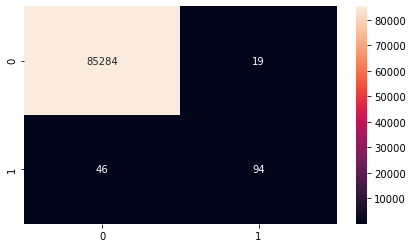

       Actual Predicted
116933    '0'       '0'
261656    '0'       '0'
209090    '0'       '0'
71083     '0'       '0'
97601     '0'       '0'


In [19]:
#13)heat map for confusion matrix
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()#print the actual and predicted labels
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(df1.head(5))

In [ ]:
"""""""""""""""""""""""""""""""""""""""Random Forest""""""""""""""""""""""""""""""""""""""""""""""""""

In [21]:
#Build the model 2 (Random Forest)
random_forest = RandomForestClassifier(n_estimators = 5)

In [22]:
# Train the classifier
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5)

In [23]:
#test the model
y_pred = random_forest.predict(X_test)

In [24]:
#confusion matrix
cm = (metrics.confusion_matrix(y_test, y_pred))
print("Confusion Matrix:\n\n",cm,"\n")
print(cm)
accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1] [0])
print("Accuracy:",accuracy)
precision=(cm[0][0])/(cm[0][0]+cm[0][1])
print("Precision:",precision)
Recall=(cm[0][0])/(cm[0][0]+cm[1][0])
print("Recall:",Recall)

Confusion Matrix:

 [[85292    11]
 [   35   105]] 

[[85292    11]
 [   35   105]]
Accuracy: 0.9994616293903538
Precision: 0.9998710479115623
Recall: 0.9995898133064564


In [25]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     85303
         '1'       0.91      0.75      0.82       140

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [26]:
#Accuracy score 
a= (metrics.accuracy_score(y_test, y_pred))
print("Accuracy score:",round(a,1)) 

Accuracy score: 1.0


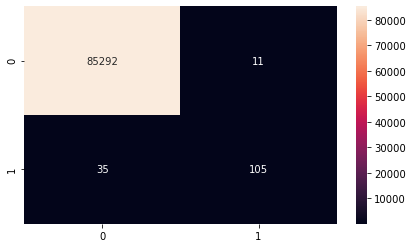

In [27]:
#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [28]:
#print the actual and predicted labels
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred}) 
print(df1.head(5))

       Actual Predicted
116933    '0'       '0'
261656    '0'       '0'
209090    '0'       '0'
71083     '0'       '0'
97601     '0'       '0'


In [ ]:
"""""""""""""""""""""""""""""""""""""""""THE END""""""""""""""""""""""""""""""""""""""""""""""""""""""

In [40]:
#Step 1 : Define a function to get historical data from google finance
import pandas as pd
import datetime

def get_historical_data(symbol,start_date,end_date):
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
    url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
    url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv(url_string, header=0, names=col_names) 
    
    df = pd.DataFrame(stocks)
    return df

In [41]:
#Step 2: get the data of desired firm from Google Finance.
data = get_historical_data('GOOGL','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017

ParserError: Error tokenizing data. C error: Expected 152 fields in line 10, saw 4754


In [42]:
#Step 3: Write the data to a csv file.
data.to_csv('google.csv',index = False)

In [ ]:
#""'""""""""""""""""""""""""""""""""""Preprocess the data""""""""""""""""""""""""""""""""""""""""""""

In [45]:
#Step 1 : Get the data from csv file.
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volu

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

KeyError: 'Open'

In [ ]:
#Step 2 : Remove Unncessary data, i.e., Date and High value
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

In [ ]:
#Step 2: Visualise raw data.
import visualize

visualize.plot_basic(stocks)

In [ ]:
#Step 3 : Normalise the data using minmaxscaler function
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(s

In [ ]:
#Step 4 : Visualize the data again
visualize.plot_basic(stocks)

In [ ]:
#Step 4 : Visualize the data again
stocks.to_csv('google_preprocessed.csv',index= False)

In [ ]:
#""""""""""""""""""""""""""""""""Bench Mark Model""""""""""""""""""""""""""""""""""""""""""""""""""""

In [ ]:
#Step 1: Load the preprocessed data
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

In [ ]:
#Step 2: Split data into train and test pair
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

In [ ]:
#Step 3: Train a Linear regressor model on training set and get prediction
model = LinearRegressionModel.build_model(X_train,y_train)


In [ ]:
#Step 4: Get prediction on test set
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)


In [ ]:
#Step 5: Plot the predicted values against actual
vs.plot_prediction(y_test,predictions)

In [ ]:
#Step 6: measure accuracy of the prediction
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
#"""""""""""""""""""""""""""""""""""""""Basic LSTM Model""""""""""""""""""""""""""""""""""""""""""""""

In [ ]:
#Step 1 : import keras libraries for smooth implementaion of lstm
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

In [ ]:
#Step 2 : Split train and test data sets and Unroll train and test data for lstm model
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

In [ ]:
#Step 3 : Build a basic Long-Short Term Memory model
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

In [ ]:
Step 4: Train the model
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

In [ ]:
#Step 5: make prediction using test data
predictions = model.predict(X_test)

In [ ]:
#Step 6: Plot the results
predictions = model.predict(X_test)
vs.plot_lstm_prediction(y_test,predictions)

In [ ]:
#Step 7: Get the test score.
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
""""""""""""""""""""""""""""""""""Improved LSTM Model""""""""""""""""""""""""""""""""""""""""""""""""

In [ ]:
#Step 1: Build an improved LSTM model
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

In [ ]:
#Step 2: Train improved LSTM model
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

In [ ]:
#Step 3: Make prediction on improved LSTM model
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

In [ ]:
#Step 4: plot the results
vs.plot_lstm_prediction(y_test,predictions)

In [ ]:
#Step 5: Get the test score
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)  

In [ ]:
#""""""""""""""""""""""""""""""""""""Checking Robustness of the model"""""""""""""""""""""""""""""""""

In [ ]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].as_matrix()
Y = stocks[:]['Close'].as_matrix()

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
""""""""""""""""""""""""""""""""""""""""""""THE END"""""""""""""""""""""""""""""""""""""""""""""""""""